# **1.Xây dựng môi trường**



In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount('/content/gdrive')
folder = '/content/gdrive/My Drive/Năm IV/Big Data/Crawl'

Mounted at /content/gdrive


In [ ]:
pip install -q underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 27.7 MB/s eta 0:00:00


In [ ]:
!pip install -q emoji
!pip install -q vncorenlp
!git clone https://github.com/vncorenlp/VnCoreNLP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Cloning into 'VnCoreNLP'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 259 (delta 17), reused 14 (delta 2), pack-reused 212
Receiving objects: 100% (259/259), 237.79 MiB | 19.37 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Updating files: 100% (34/34), done.


In [ ]:
!pip install scikit-learn


In [ ]:
!pip install h5py


In [ ]:
import pandas as pd
import os
import regex
import re
import underthesea
import tensorflow as tf
import numpy as np
import string
from keras.models import load_model
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from underthesea import text_normalize
from underthesea import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import json
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
import warnings
import joblib
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.metrics         import auc, roc_curve
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score, make_scorer
from tabulate import tabulate  # Install using: pip install tabulate
# Tắt tất cả cảnh báo
warnings.filterwarnings("ignore")

# **2. Chuẩn bị dữ liệu**

In [ ]:
df = pd.read_csv(folder + '/Crawl Data/comments_data_ncds.csv')

In [ ]:
df.head(5)

,id,title,content,rating
0,NaN,Cực kì hài lòng,"Máy có ngoại hình khá bắt mắt, tốc độ xử lý đô...",5
1,NaN,Cực kì hài lòng,"Thời gian đầu, ngoại trừ độ ổn định wifi, mọi ...",5
2,NaN,Cực kì hài lòng,"Shiper rất nhiệt tình và tận tâm, giao hàng nh...",5
3,NaN,Cực kì hài lòng,"Sản phẩm giá tốt, rất đáng tiền………….rẻ hơn hệ ...",5
4,NaN,Cực kì hài lòng,Sản phẩm chất lượng đúng như mô tả. Đóng gói c...,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       0 non-null      float64
 1   title    8248 non-null   object 
 2   content  4195 non-null   object 
 3   rating   8248 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 257.9+ KB


In [ ]:
df.drop(['id','title'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4195 non-null   object
 1   rating   8248 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 129.0+ KB


In [ ]:
# Đếm số lượng bản ghi của từng mức sao trong cột 'rating'
rating_counts = df['rating'].value_counts()
print(rating_counts)

5    7172
4     692
1     189
3     133
2      62
Name: rating, dtype: int64


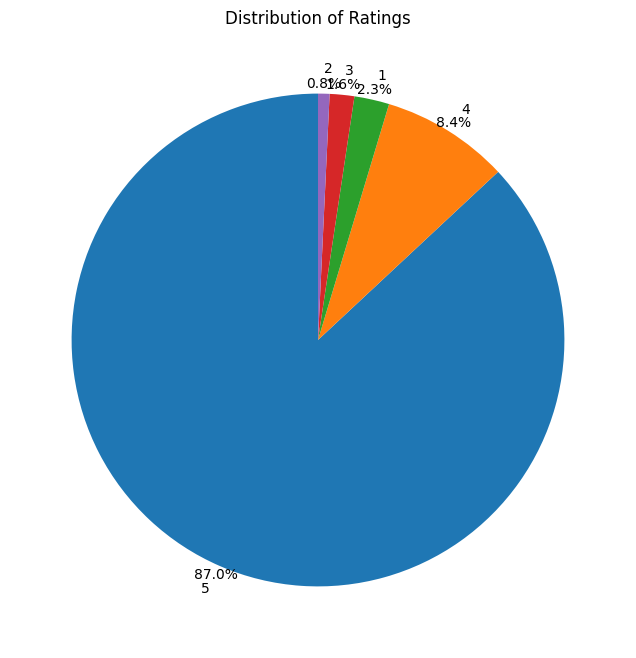

In [ ]:
# Tính toán số lượng của mỗi đánh giá
n_star_counts = df['rating'].value_counts()

# Biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(n_star_counts, labels=n_star_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=1.04)
plt.title('Distribution of Ratings')
plt.show()

---
# **3. Tiền xử lý dữ liệu**
---
Tiền xử lý dữ liệu tiếng Việt cho bài toán phân loại văn bản gồm các việc sau:
 * Chuẩn hóa bảng mã Unicode (đưa về Unicode tổ hợp dựng sẵn)
 * Chuẩn hóa kiểu gõ dấu tiếng Việt (dùng òa úy thay cho oà uý)
 * Thực hiện tách từ tiếng Việt (sử dụng thư viện tách từ như pyvi, underthesea, vncorenlp,…)
 * đưa về văn bản lower (viết thường)
 * Xóa các ký tự đặc biệt: “.”, “,”, “;”, “)”, …
 * Loại bỏ stopword

## 3.1. Kiểm tra bộ dữ liệu

### Kiểm tra null

In [ ]:
null_content = df['content'].isnull().sum()print("Số lượng giá trị null trong cột 'content':", null_content)

Số lượng giá trị null trong cột 'content': 4053


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4195 non-null   object
 1   rating   4195 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 65.7+ KB


In [ ]:
df['content'] = df['content'].astype(str)

def cleaner_update(text):
    return text.translate(str.maketrans('','', string.punctuation)).lower()

tokenize_df=[]
for i in range(0,len(df)):
    clean = cleaner_update(df['content'][i])
    tokenize_df.append(underthesea.word_tokenize(clean))
print(tokenize_df)

[['máy', 'có', 'ngoại hình', 'khá', 'bắt mắt', 'tốc độ', 'xử lý', 'đôi khi', 'bị', 'lag', 'nhẹ', 'do', 'cấu hình', 'vừa phải', 'tuy nhiên', 'shop', 'giao', 'hàng', 'cực', 'nhanh', 'ngay', 'trong', 'ngày', 'mùng', '1', 'tết', 'đặt', 'hỏa tốc', '2', 'h', 'có', 'hàng', 'đúng', 'là', 'tiki', 'và', 'đội ngũ', 'giao', 'hàng', 'tiki', 'làm việc', 'rất', 'chuyên nghiệp', 'đã', 'lâu ko', 'sử dụng', 'dịch vụ', 'của', 'tiki', 'nhưng', 'hôm nay', 'dùng', 'lại', 'quả thật', 'vẫn', 'rất', 'hài lòng'], ['thời gian', 'đầu', 'ngoại trừ', 'độ', 'ổn định', 'wifi', 'mọi', 'thứ', 'đều', 'xúng', 'đáng', '5', 'máy', 'hay', 'bị', 'mất', 'wifi', 'phải', 'reset', 'cài đặt', 'các', 'thông số', 'mạng', 'sau', 'khi', 'reset máy', 'lại', 'như', 'mới', 'xuất xưởng', 'tắt', 'tự động', 'cập nhật linh', 'tinh tắt', 'ram ảo', 'không', 'thấy', 'tác dụng', 'của', 'ram ảo', 'chỉ', 'cài', 'ít', 'ứng ứng', 'thật', 'cần thiết', 'vì', 'chỉ', 'là', 'máy', 'phụ', 'máy', 'hiện', 'sử dụng', 'rất', 'ổn', 'có lẽ', 'trước', 'đó', 'bị

In [ ]:
words=[]
for m in range(0,len(tokenize_df)):
    for n in range(0,len(tokenize_df[m])):
        words.append(tokenize_df[m][n])
print(words)

['máy', 'có', 'ngoại hình', 'khá', 'bắt mắt', 'tốc độ', 'xử lý', 'đôi khi', 'bị', 'lag', 'nhẹ', 'do', 'cấu hình', 'vừa phải', 'tuy nhiên', 'shop', 'giao', 'hàng', 'cực', 'nhanh', 'ngay', 'trong', 'ngày', 'mùng', '1', 'tết', 'đặt', 'hỏa tốc', '2', 'h', 'có', 'hàng', 'đúng', 'là', 'tiki', 'và', 'đội ngũ', 'giao', 'hàng', 'tiki', 'làm việc', 'rất', 'chuyên nghiệp', 'đã', 'lâu ko', 'sử dụng', 'dịch vụ', 'của', 'tiki', 'nhưng', 'hôm nay', 'dùng', 'lại', 'quả thật', 'vẫn', 'rất', 'hài lòng', 'thời gian', 'đầu', 'ngoại trừ', 'độ', 'ổn định', 'wifi', 'mọi', 'thứ', 'đều', 'xúng', 'đáng', '5', 'máy', 'hay', 'bị', 'mất', 'wifi', 'phải', 'reset', 'cài đặt', 'các', 'thông số', 'mạng', 'sau', 'khi', 'reset máy', 'lại', 'như', 'mới', 'xuất xưởng', 'tắt', 'tự động', 'cập nhật linh', 'tinh tắt', 'ram ảo', 'không', 'thấy', 'tác dụng', 'của', 'ram ảo', 'chỉ', 'cài', 'ít', 'ứng ứng', 'thật', 'cần thiết', 'vì', 'chỉ', 'là', 'máy', 'phụ', 'máy', 'hiện', 'sử dụng', 'rất', 'ổn', 'có lẽ', 'trước', 'đó', 'bị', 

### Xem tất cả các từ

In [ ]:
def df_count_word(words_list):
  df_count = pd.DataFrame(words_list,columns=['word'])
  df_count = df_count['word'].value_counts().reset_index()
  df_count.columns = ['word', 'count']
  return df_count

def WordCloudvisualization(df_count):
  # Chuyển DataFrame thành Dictionary để sử dụng cho WordCloud
  word_dict = dict(zip(df_count['word'], df_count['count']))

  # Tạo WordCloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

  # Vẽ biểu đồ WordCloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

def WordLine(df_count):
    # Vẽ biểu đồ đường
    plt.plot(df_count['word'], df_count['count'], linestyle='-', color='b', label='Dữ liệu mẫu')

    # Đặt tên cho trục x và y
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')

    # Thêm tiêu đề cho biểu đồ
    plt.title('Biểu đồ đường theo thứ tự tăng dần của X')

    # Hiển thị chú thích
    plt.legend()

    # Hiển thị biểu đồ
    plt.show()

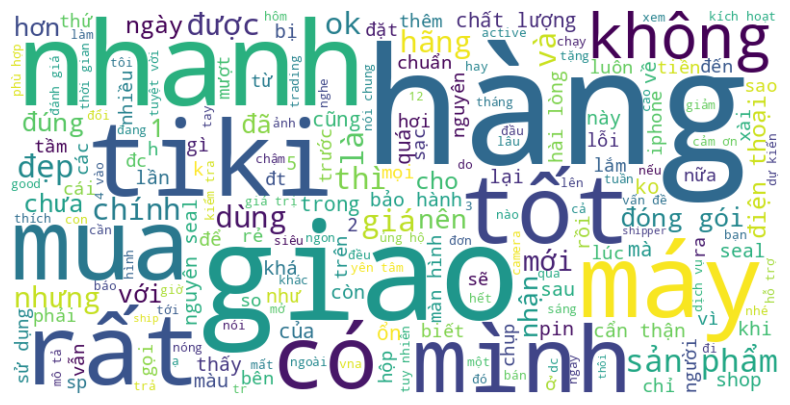

In [ ]:
WordCloudvisualization(df_count_word(words))

## 3.2.Xử lý tiếng Việt


###Xử lý láy âm tiết

In [ ]:
def handle_repeated_syllables(text):
    # Sử dụng regex để tìm các từ có âm tiết lặp lại (ví dụ: quááááá)
    repeated_syllables_pattern = re.compile(r'(\w+?)\1+', re.UNICODE)
    # Hàm xử lý việc loại bỏ âm tiết lặp lại
    def handle_repetition(match):
        word = match.group(1)
        # Giữ lại chỉ một phần lặp lại và thêm vào từ gốc
        return word

    # Áp dụng hàm xử lý vào chuỗi
    processed_text = repeated_syllables_pattern.sub(handle_repetition, text)
    return processed_text
# Sử dụng hàm với ví dụ
input_text = "Ngooon quááááá điiiiiiii"
output_text = handle_repeated_syllables(input_text)
print(output_text)

Ngon quá đi


### Loại bỏ các common content

In [ ]:
EMAIL = re.compile(r"([\w0-9_\.-]+)(@)([\d\w\.-]+)(\.)([\w\.]{2,6})")
URL = re.compile(r"https?:\/\/(?!.*:\/\/)\S+")
PHONE = re.compile(r"(09|01[2|6|8|9])+([0-9]{9})\b")
MENTION = re.compile(r"@.+?:")
NUMBER = re.compile(r'\b\d+\S*\b')
DATETIME = '\d{1,2}\s?[/-]\s?\d{1,2}\s?[/-]\s?\d{4}'

# Delete price, 3g/4g/5g
PRICE = r'\b\d{1,4}(?:\.\d{3})*(?:\.\d+)?(?:[ktrđg])\b'

def replace_common_token(txt):
    txt = re.sub(EMAIL, ' ', txt)
    txt = re.sub(URL, ' ', txt)
    txt = re.sub(MENTION, ' ', txt)
    txt = re.sub(DATETIME, ' ', txt)
    txt = re.sub(NUMBER, ' ', txt)
    txt = re.sub(PRICE, ' ', txt)
    return txt

# Ví dụ sử dụng
text = "máy mạnh mượt trong tầm giá 3g nay 0889273527 jk mua khanhphuhv@gmail.com được giảm giá 300k còn 2690k thôi cấu hình mạnh chơi liên quân mượt nhân viên vui vẻ nhiệt tình về camera thì tạm thôi pin cực kì trâu nhưng không có sạc nhanh trải nghiệm thì thấy tất cả điều ổn ai chơi game thì chọn con này chứ chụp hình thì đừng nên mua hi vọng sài lâu không bị lỗi gì . "
text = """Mua được gần tháng từ ngày 15/7/2023 cảm thấy hài lòng
Pin trâu chơi liên quân bằng 3g liên tục đk 6-7 tiếng vẫn còn gần 40% pin
Máy đẹp sạc từ 30% lên 100% có gần 2 tiếng là đầy
Nhân viên chu đáo nhiệt tình"""
text_replace_common_token = text_normalize(handle_repeated_syllables(replace_common_token(text)))
print(text_replace_common_token)

Mua được gần tháng từ ngày cảm thấy hài lòng Pin trâu chơi liên quân bằng liên tục đk tiếng vẫn còn gần % pin Máy đẹp sạc từ % lên % có gần tiếng là đầy Nhân viên chu đáo nhiệt tình


### Loại bỏ dấu câu và ký tự xuống dòng

In [ ]:
def remove_unnecessary_characters(text):
    RE_CLEAR = re.compile("[\n\r]+")# Thay thế các chuỗi xuống dòng (\n hoặc \r) bằng một ký tự trắng
    text = re.sub(RE_CLEAR, ' ', text)
    # Sử dụng string.punctuation để lấy tất cả các ký tự dấu câu
    translator = str.maketrans('', '', string.punctuation)
    # Loại bỏ dấu câu từ văn bản sử dụng bảng dịch (translator)
    text = text.translate(translator)

    return text

# Ví dụ sử dụng
text = """Đây là một đoạn__' văn bản,
 có chứa dấu câu! Xin chào các bạn."""
text_without_punctuation = remove_unnecessary_characters(text)
print(text_without_punctuation)

Đây là một đoạn văn bản  có chứa dấu câu Xin chào các bạn


### Chuẩn hóa các từ viết tắt cơ bản


In [ ]:
# (Ví dụ: k, ko, k0 --> không, bt --> bình thường,...)

In [ ]:
def normalize_acronyms(text, teencode_file=folder+'/Data/teencode.xlsx'):
    # Đọc dữ liệu từ tệp Excel teencode.xlsx
    teencode_df = pd.read_excel(teencode_file, header=None, names=['teencode', 'replace'])

    words = []
    for word in text.strip().split():
        word = word.strip(string.punctuation)
        # Tìm kiếm trong teencode_df và thay thế
        replacement = teencode_df.loc[teencode_df['teencode'].str.lower() == word, 'replace'].values
        if len(replacement) > 0:
            words.append(replacement[0])
        else:
            words.append(word)

    return ' '.join(words)

# Sử dụng hàm normalize_acronyms với tệp Excel teencode.xlsx
input_text = "ko biết tại sao ad tại ntn"
output_text = normalize_acronyms(input_text)
print(output_text)

không biết tại sao admin tại như thế nào


## **Tổng hợp lần 1**

In [ ]:
def text_preprocess(text):
    # 1. Chuẩn hóa văn bản tiếng việt
    text = text_normalize(text)
    # 2. Xử lý láy âm tiết
    text = handle_repeated_syllables(text)
    # 3. Loại bỏ các common token
    text = replace_common_token(text)
    # 4. Xóa bỏ dấu câu
    text = remove_unnecessary_characters(text)
    # 5. Đưa về lower
    text = text.lower()
    # 6. Chuẩn hóa các từ viết tắt cơ bản
    text = normalize_acronyms(text)
    return text

# Sử dụng lớp TextPreprocess
text_to_preprocess = """Mua được gần tháng từ ngày 15/7/2023 cảm thấy hài lòng
Pin trâu chơi liên quân bằng 3g liên tục đk 6-7 tiếng vẫn còn gần 40% pin
Máy đẹp sạc từ 30% lên 100% có gần 2 tiếng là đầy
Nhân viên chu đáo nhiệt tình"""

preprocessed_text = text_preprocess(text_to_preprocess)
preprocessed_text

'mua được gần tháng từ ngày cảm thấy hài lòng pin trâu chơi liên quân bằng g liên tục được tiếng vẫn còn gần pin máy đẹp sạc từ lên có gần tiếng là đầy nhân viên chu đáo nhiệt tình'

In [ ]:
df["content_clean"] = df['content'].apply(text_preprocess)
df

,content,rating,content_clean
0,"Máy có ngoại hình khá bắt mắt, tốc độ xử lý đô...",5,máy có ngoại hình khá bắt mắt tốc độ xử lý đôi...
1,"Thời gian đầu, ngoại trừ độ ổn định wifi, mọi ...",5,thời gian đầu ngoại trừ độ ổn định wifi mọi th...
2,"Shiper rất nhiệt tình và tận tâm, giao hàng nh...",5,shiper rất nhiệt tình và tận tâm giao hàng nha...
3,"Sản phẩm giá tốt, rất đáng tiền………….rẻ hơn hệ ...",5,sản phẩm giá tốt rất đáng tiền … … … … rẻ hơn ...
4,Sản phẩm chất lượng đúng như mô tả. Đóng gói c...,5,sản phẩm chất lượng đúng như mô tả đóng gói cẩ...
...,...,...,...
4190,Máy nguyên seal nguyên hộp. Giao hàng nhanh. N...,5,máy nguyên seal nguyên hộp giao hàng nhanh nói...
4191,"Shop giao hàng uy tín, hàng chuẩn đẹp nhé\r\n ...",5,cửa hàng giao hàng uy tín hàng chuẩn đẹp nhé c...
4192,Máy OK,5,máy ok
4193,Đúng quảng cáo!,5,đúng quảng cáo


In [ ]:
nan_values = df.isna().sum()
print(nan_values)

content          0
rating           0
content_clean    0
dtype: int64


### Tải bộ từ điển tiếng việt

In [ ]:
# Chia các từ trong cột "content_clean" theo khoảng trắng
no_tokenize_df=[]
for i in range(0,len(df)):
    clean = cleaner_update(df['content_clean'][i])
    no_tokenize_df.append(clean.split())

words_no_token=[]
for m in range(0,len(no_tokenize_df)):
    for n in range(0,len(no_tokenize_df[m])):
        words_no_token.append(no_tokenize_df[m][n])
df_words_no_token = df_count_word(words_no_token) # lấy tất cả các từ đơn trong df

In [ ]:
# Lấy từ điển tiếng việt
vocabulary = []
file_path = folder + "/Data/words.txt"

with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        # print(line.strip())
        vocabulary.append(line.strip())

vocab_in_dict = pd.DataFrame([json.loads(vocab) for vocab in vocabulary]) # Lấy thấy cả từ trong từ điển

In [ ]:
# Chuyển thành các từ đơn và loại bỏ trùng lặp
vid = vocab_in_dict['text']
word_dict = []

for v in vid:
    word_dict += (v.lower().split(' '))

word_dict_ = list(set(word_dict))

In [ ]:
# Chuẩn hóa cho các từ trong từ điển
word_dict = []
for word in word_dict_:
  word = text_normalize(word)
  word_dict.append(word)

In [ ]:
# Kiểm tra những từ nào không có trong từ điển tiếng Việt
words_in_comment = df_words_no_token['word']
word_not_in_dict = []
for wic in words_in_comment:
    if wic not in word_dict:
        word_not_in_dict.append(wic)

In [ ]:
# chuyển thành df và sắp xếp theo thứ tự alphabel
not_vietnamese = pd.DataFrame(word_not_in_dict, columns=['word'])
not_vietnamese.sort_values(by='word')

,word
460,a03
702,a13
628,a15
533,a26
158,a34
...,...
796,🤧
78,🤩
443,🤬
121,🥲


In [ ]:
not_vietnamese.to_csv(folder+'/Data/not_vietnamese.csv')

In [ ]:
not_vietnamese = pd.read_csv(folder + '/Data/not_vietnamese.csv')

### Xử lý các từ viết dính nhau

In [ ]:
# Lấy các từ không phải tiếng việt dài hơn 6 (từ tiếng việt dài nhất là 6 chữ)
not_vietnamese_than_6 = not_vietnamese[not_vietnamese['word'].apply(lambda x: len(x) > 6)].reset_index(drop=True)
words_no_token_than_6=[]
for m in range(0,len(not_vietnamese_than_6)):
        words_no_token_than_6.append(not_vietnamese_than_6['word'][m].lower())
words_no_token_than_6

['trading',
 'samsung',
 'tikinow',
 'youtube',
 'android',
 'voucher',
 'facebook',
 'shopback',
 'tikitrading',
 'facebok',
 'sacombank',
 'snapdragon',
 'comment',
 'amazing',
 'platinum',
 'airdrop',
 'citibank',
 'flashsale',
 'activate',
 'bluetoth',
 'hotline',
 'discount',
 'recomended',
 'telegram',
 'fptshop',
 'shiping',
 'silicon',
 'adapter',
 'service',
 'unmeishop',
 'website',
 'recomend',
 'nửađêmtikigiaoiphone15',
 'samcenter',
 'flaship',
 'pascode',
 'tikicare',
 'onscren',
 'flagship',
 'transfer',
 'topzone',
 'uniformity',
 'packing',
 'activated',
 'hungviland',
 'restart',
 'camtele',
 'tranding',
 'smartphone',
 'yuotube',
 'reasonable',
 'sealgiao',
 'factory',
 'traning',
 'genshin',
 'hàngkhông',
 'zsjwsjsndnnddnndnxndndndnd',
 'shoping',
 'standrad',
 'services',
 'videocal',
 'inserted',
 'phoneinfo',
 'firmware',
 'tiki5sao',
 'tecnoshop',
 'natural',
 'esmejeib2vyzbsnsmwiwvyd7h3',
 'lightning',
 'hàngnhanh',
 'sacobank',
 'jejdkdmdjd',
 'nhanhdien',
 'p

In [ ]:
def stuck_words(text):
  for i in range(1,len(text)):
      word1 = text[:i]
      word2 = text[i:]
      if word1 in word_dict and word2 in word_dict:
          text_after = word1 + ' ' + word2
          return text_after
          break
text = 'khámbệnh'
stuck_words(text)

'khám bệnh'

In [ ]:
# Gán các giá trị có thể tách ra vào cột mới stuck_word
not_vietnamese_than_6['stuck_word'] = float('nan')
for i in not_vietnamese_than_6['word']:
    not_vietnamese_than_6.loc[not_vietnamese_than_6['word'] == i, 'stuck_word'] = stuck_words(i)

In [ ]:
df_stuck_words = not_vietnamese_than_6.dropna()
df_stuck_words # Bộ từ bị dính nhau và được tách ra trong df

,Unnamed: 0,word,stuck_word
1,8,samsung,sam sung
14,174,platinum,platin um
26,232,silicon,silic on
55,428,hàngkhông,hàng không
60,464,videocal,video cal
69,505,hàngnhanh,hàng nhanh
82,587,shopdun,shop dun
111,720,location,lo cation


In [ ]:
def normalize_stuck(text, df_stuck_words=df_stuck_words):
    words = []
    for word in text.strip().split():
        word = word.strip(string.punctuation)
        # Tìm kiếm trong teencode_df và thay thế
        replacement = df_stuck_words.loc[df_stuck_words['word'].str.lower() == word, 'stuck_word'].values
        if len(replacement) > 0:
            words.append(replacement[0])
        else:
            words.append(word)

    return ' '.join(words)

# Sử dụng hàm normalize_acronyms với tệp Excel teencode.xlsx
input_text = "không biết tại sao lại được giao hàngnhanh thế"
output_text = normalize_stuck(input_text)
print(output_text)

không biết tại sao lại được giao hàng nhanh thế


In [ ]:
nan_values = df.isna().sum()
print(nan_values)

content          0
rating           0
content_clean    0
dtype: int64


### Xử lý các từ không có nghĩa ít hơn 3 chữ

In [ ]:
not_vietnamese_less_3 = not_vietnamese[not_vietnamese['word'].apply(lambda x: len(x) < 3)].reset_index(drop=True)
not_vietnamese_less_3

,Unnamed: 0,word
0,10,…
1,14,ip
2,16,😆
3,19,ap
4,24,👌
...,...,...
124,888,💓
125,899,or
126,901,kv
127,907,’


In [ ]:
not_vietnamese_less_3 = list(set(not_vietnamese_less_3['word']))
# Qua kiểm tra thấy các từ không phải tiếng việt ngắn hơn 3 hầu hết không có nghĩa, nên thực hiện đưa các từ này vào stopword để loại bỏ

In [ ]:
nan_values = df.isna().sum()
print(nan_values)

content          0
rating           0
content_clean    0
dtype: int64


### Loại bỏ các stopword tiếng Việt


In [ ]:
def load_data(txt_file):
    """
    Each document is one line, documents is already preprocess like: remove truncate, tokenize, strip, ...
    :param txt_file: path/to/text/file
    :return: list of documents
    """
    texts = []
    with open(txt_file, 'r', encoding='utf8') as fp:
        for line in fp.readlines():
            texts.append(line.strip())
    return texts


def get_stopwords(documents, threshold=3):
    """
    :param documents: list of documents
    :param threshold:
    :return: list of words has idf <= threshold
    """
    tfidf = TfidfVectorizer(min_df=100)
    tfidf_matrix = tfidf.fit_transform(documents)
    features = tfidf.get_feature_names_out()
    stopwords = []
    print(min(tfidf.idf_), max(tfidf.idf_), len(features))
    for index, feature in enumerate(features):
        if tfidf.idf_[index] <= threshold:
            stopwords.append(feature)
    return stopwords


def check_stopwords_in_file(word_list, file_path):
    # Đọc nội dung từ file stopword.txt
    with open(file_path, 'r', encoding='utf-8') as file:
        stopword_content = file.read()

    # Kiểm tra từng từ trong danh sách
    stopwords_found = [word for word in word_list if word in stopword_content]

    return stopwords_found

# loại stopword khỏi dữ liệu
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

In [ ]:
# Danh sách từ cần kiểm tra
stopwords = get_stopwords(load_data(folder + r"/Data/Crawlcontent.txt"), threshold=10)
# Đường dẫn đến file stopword.txt
stopword_file_path = folder + "/Data/stopwords.txt"
# Kiểm tra các từ trong danh sách có trong stopword.txt không
stopword = check_stopwords_in_file(stopwords, stopword_file_path)
# Hiển thị kết quả
print("Các từ có trong stopword.txt:", stopword)

2.541972355964006 5.484846797653552 142
Các từ có trong stopword.txt: ['biết', 'bị', 'cao', 'cho', 'chính', 'chưa', 'chỉ', 'các', 'còn', 'có', 'cũng', 'cả', 'của', 'gì', 'hơn', 'hết', 'khi', 'khá', 'không', 'luôn', 'là', 'làm', 'lại', 'lần', 'mà', 'mình', 'mới', 'ngày', 'người', 'nhiều', 'như', 'nhưng', 'nhận', 'nào', 'này', 'nên', 'nói', 'phải', 'quá', 'ra', 'rất', 'rồi', 'sau', 'sẽ', 'tháng', 'thì', 'thấy', 'thời', 'trong', 'trên', 'trước', 'từ', 'và', 'vì', 'vẫn', 'về', 'với', 'đã', 'được', 'để']


In [ ]:
len(stopword)

60

In [ ]:
# Không bỏ từ không
if "không" in stopword:
    stopword.remove("không")
print("Các từ có trong stopword.txt:", stopword)

Các từ có trong stopword.txt: ['biết', 'bị', 'cao', 'cho', 'chính', 'chưa', 'chỉ', 'các', 'còn', 'có', 'cũng', 'cả', 'của', 'gì', 'hơn', 'hết', 'khi', 'khá', 'luôn', 'là', 'làm', 'lại', 'lần', 'mà', 'mình', 'mới', 'ngày', 'người', 'nhiều', 'như', 'nhưng', 'nhận', 'nào', 'này', 'nên', 'nói', 'phải', 'quá', 'ra', 'rất', 'rồi', 'sau', 'sẽ', 'tháng', 'thì', 'thấy', 'thời', 'trong', 'trên', 'trước', 'từ', 'và', 'vì', 'vẫn', 'về', 'với', 'đã', 'được', 'để']


In [ ]:
stopword = stopword + not_vietnamese_less_3
print(stopword)

['biết', 'bị', 'cao', 'cho', 'chính', 'chưa', 'chỉ', 'các', 'còn', 'có', 'cũng', 'cả', 'của', 'gì', 'hơn', 'hết', 'khi', 'khá', 'luôn', 'là', 'làm', 'lại', 'lần', 'mà', 'mình', 'mới', 'ngày', 'người', 'nhiều', 'như', 'nhưng', 'nhận', 'nào', 'này', 'nên', 'nói', 'phải', 'quá', 'ra', 'rất', 'rồi', 'sau', 'sẽ', 'tháng', 'thì', 'thấy', 'thời', 'trong', 'trên', 'trước', 'từ', 'và', 'vì', 'vẫn', 'về', 'với', 'đã', 'được', 'để', 'ze', '️', 'ip', 'xr', 'hk', 'or', 't4', '😎', '🌐', 'dx', 'we', 'gh', '🥺', 'id', 'ol', 'pm', 'đv', '🤔', 'tk', '🤤', 'dv', 's2', 'hđ', 'đh', '🍀', 'h5', 'tm', '🤩', 't3', 'hn', '😻', '☺', '🤬', 'yb', 'pr', 'ap', 'vl', 'dd', '🏻', '🐘', '😑', '🤓', 'up', 'os', '🍷', '❤', 'lỳ', '💚', 's8', '😋', '😇', 'db', 'rv', '🤣', 'ạa', '🤧', 'bh', 'íu', 'xò', 'fl', '💓', '🇳', '💞', 't6', 'dl', '👌', '🌿', '♥', 'lq', '🌹', '😄', 'jt', 'lg', 'pk', 'f3', '😽', '💖', 'kv', 'h0', 'tg', 'az', '☎', '😅', '😊', 'ps', 'qt', 'ux', '…', '😁', '🐃', '”', 'kn', '😡', 'gt', '😗', '🥲', 'nh', 'zị', '💙', 't7', '♀', '👏', 'hp', '

In [ ]:
def save_list_to_txt(my_list, file_path):
    """
    Lưu danh sách vào một file văn bản.

    Parameters:
    - my_list: Danh sách cần lưu.
    - file_path: Đường dẫn của file văn bản.

    Returns:
    None
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        for item in my_list:
            file.write(str(item) + '\n')
# Lưu lại để dùng sau này
save_list_to_txt(stopword, folder + '/Data/stopword_train.txt')

In [ ]:
stopword = []
with open(folder + '/Data/stopword_train.txt', 'r', encoding='utf8') as fp:
    for line in fp.readlines():
        stopword.append(line.strip())
len(stopword)

188

In [ ]:
remove_stopwords('có yêu mình hơm')

'yêu hơm'

In [ ]:
nan_values = df.isna().sum()
print(nan_values)

content          0
rating           0
content_clean    0
dtype: int64


## **Tổng hợp lần 2**

In [ ]:
def text_preprocess2(text):
    # 7. Tách các từ viết dính nhau
    text = normalize_stuck(text)
    # 8. Loại bỏ các stopword tiếng Việt
    text = remove_stopwords(text)
    # 9. Loại bỏ các khoảng trắng liên tiếp
    RE_CLEAR = re.compile("\s+") # Các khoảng trắng liên tiếp
    text = re.sub(RE_CLEAR,' ', text)
    return text

# Sử dụng lớp TextPreprocess
text_to_preprocess = """hàngnhanh  ừm quá r đó, có gì đâu, bị gì á a7, ln"""

preprocessed_text = text_preprocess2(text_to_preprocess)
preprocessed_text

'hàng nhanh ừm r đó đâu á a7 ln'

In [ ]:
df["content_clean2"] = df['content_clean'].apply(text_preprocess2)
df

,content,rating,content_clean,content_clean2
0,"Máy có ngoại hình khá bắt mắt, tốc độ xử lý đô...",5,máy có ngoại hình khá bắt mắt tốc độ xử lý đôi...,máy ngoại hình bắt mắt tốc độ xử lý đôi lag nh...
1,"Thời gian đầu, ngoại trừ độ ổn định wifi, mọi ...",5,thời gian đầu ngoại trừ độ ổn định wifi mọi th...,gian đầu ngoại trừ độ ổn định wifi mọi thứ đều...
2,"Shiper rất nhiệt tình và tận tâm, giao hàng nh...",5,shiper rất nhiệt tình và tận tâm giao hàng nha...,shiper nhiệt tình tận tâm giao hàng nhanh đóng...
3,"Sản phẩm giá tốt, rất đáng tiền………….rẻ hơn hệ ...",5,sản phẩm giá tốt rất đáng tiền … … … … rẻ hơn ...,sản phẩm giá tốt đáng tiền rẻ hệ thống cửa hàn...
4,Sản phẩm chất lượng đúng như mô tả. Đóng gói c...,5,sản phẩm chất lượng đúng như mô tả đóng gói cẩ...,sản phẩm chất lượng đúng mô tả đóng gói cẩn th...
...,...,...,...,...
4190,Máy nguyên seal nguyên hộp. Giao hàng nhanh. N...,5,máy nguyên seal nguyên hộp giao hàng nhanh nói...,máy nguyên seal nguyên hộp giao hàng nhanh chu...
4191,"Shop giao hàng uy tín, hàng chuẩn đẹp nhé\r\n ...",5,cửa hàng giao hàng uy tín hàng chuẩn đẹp nhé c...,cửa hàng giao hàng uy tín hàng chuẩn đẹp nhé c...
4192,Máy OK,5,máy ok,máy ok
4193,Đúng quảng cáo!,5,đúng quảng cáo,đúng quảng cáo


In [ ]:
nan_values = df.isna().sum()
print(nan_values)

content           0
rating            0
content_clean     0
content_clean2    0
dtype: int64


## 3.3. Tokenizing


### Tách từ tiếng Việt (Postagging)

In [ ]:
# Word segmentation
def word_segmentation(text):
    text = underthesea.word_tokenize(text, format="text")
    return text

In [ ]:
nan_values = df.isna().sum()
print(nan_values)

content           0
rating            0
content_clean     0
content_clean2    0
dtype: int64


In [ ]:
#df.dropna(inplace=True)

In [ ]:
# Áp dụng hàm word_segmentation() lên các giá trị của cột 'content_clean2'
df['content_token'] = df['content_clean2'].apply(lambda x: word_segmentation(str(x)) if isinstance(x, str) else x)


In [ ]:
#df['content_token'] = df['content_clean2'].apply(word_segmentation)

In [ ]:
nan_values = df.isna().sum()
print(nan_values)

content           0
rating            0
content_clean     0
content_clean2    0
content_token     0
dtype: int64


In [ ]:
null_values_isnull = df.isnull().sum()
print(null_values_isnull)

content           0
rating            0
content_clean     0
content_clean2    0
content_token     0
dtype: int64


## 3.4. Vector hóa dữ liệu

In [ ]:
df.to_csv(folder + '/Data/Content_clean.csv', index=False)


In [ ]:
df_cln = pd.read_csv(folder + '/Data/Content_clean.csv')

In [ ]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         4195 non-null   object
 1   rating          4195 non-null   int64 
 2   content_clean   4187 non-null   object
 3   content_clean2  4184 non-null   object
 4   content_token   4184 non-null   object
dtypes: int64(1), object(4)
memory usage: 164.0+ KB


In [ ]:
nan_values = df_cln.isna().sum()
print(nan_values)

content            0
rating             0
content_clean      8
content_clean2    11
content_token     11
dtype: int64


In [ ]:
null_values_isnull = df_cln.isnull().sum()
print(null_values_isnull)

content            0
rating             0
content_clean      8
content_clean2    11
content_token     11
dtype: int64


In [ ]:
df_cln.dropna(inplace=True)

In [ ]:
nan_values = df_cln.isna().sum()
print(nan_values)

content           0
rating            0
content_clean     0
content_clean2    0
content_token     0
dtype: int64


In [ ]:
X, y = df['content_token'], df['rating']
# X, y = sampled_data['comment_token'], sampled_data['n_star']

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(df['comment_token'], df['n_star'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 5), stop_words=stopword, max_df=0.5, min_df=5)
tfidf_vectorizer = TfidfTransformer(use_idf=False, sublinear_tf = True, norm='l2', smooth_idf=True)

X_train = count_vectorizer.fit_transform(X_train)
X_train = tfidf_vectorizer.fit_transform(X_train)

X_test = count_vectorizer.transform(X_test)
X_test = tfidf_vectorizer.transform(X_test)

# **4. Xây dựng và huấn luyện mô hình**


## 4.1. Học máy: naive_bayes

In [ ]:
# Khởi tạo mô hình MultinomialNB
naive_bayes_classifier = MultinomialNB()

# Thiết lập các tham số cần tìm kiếm
parameters = {
    'force_alpha' : (True, False),
    'fit_prior': (True, False),
    'alpha': (1, 0.1, 0.01)
}

# Khởi tạo GridSearchCV với mô hình   , tham số và số lượng fold trong cross-validation (cv)
grid_search_nb = GridSearchCV(estimator=naive_bayes_classifier, param_grid=parameters, cv=5, scoring='accuracy')

# Huấn luyện GridSearchCV trên dữ liệu
grid_search_nb.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid_search_nb.best_params_)

Best Parameters: {'alpha': 0.01, 'fit_prior': True, 'force_alpha': True}


In [ ]:
best_parameters = grid_search_nb.best_params_
# Best Parameters = {'alpha': 0.1, 'fit_prior': True, 'force_alpha': True}

# Lấy ra giá trị của mỗi tham số
best_force_alpha = best_parameters['force_alpha']
best_fit_prior = best_parameters['fit_prior']
best_alpha = best_parameters['alpha']

# Xây dựng mô hình MultinomialNB
nb_model = MultinomialNB(force_alpha = best_force_alpha, fit_prior = best_fit_prior, alpha = best_alpha)
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.01, force_alpha=True)

In [ ]:
# Dự đoán trên tập val
y_pred_nb = nb_model.predict(X_test)

In [ ]:
# Đường dẫn để lưu mô hình
model_path = '/content/gdrive/My Drive/Năm IV/Big Data/Crawl/Model/nb_model.pkl'
# Lưu mô hình
joblib.dump(nb_model, model_path)

['/content/gdrive/My Drive/Năm IV/Big Data/Crawl/Model/nb_model.pkl']

## 4.2. Học sâu: LTSM

In [ ]:
# @title Data split
X, y = df['content_token'], df['rating']

# OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(y.values.reshape(-1, 1))
y = encoded_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vectorizer = CountVectorizer(ngram_range=(1, 5), stop_words=stopword, max_df=0.5, min_df=5)
tfidf_vectorizer = TfidfTransformer(use_idf=False, sublinear_tf = True, norm='l2', smooth_idf=True)

X_train = count_vectorizer.fit_transform(X_train)
X_train = tfidf_vectorizer.fit_transform(X_train)

X_test = count_vectorizer.transform(X_test)
X_test = tfidf_vectorizer.transform(X_test)

In [ ]:
# @title LSTM
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()

y_train_array = y_train.toarray()
y_test_array = y_test.toarray()

max_length = X_train_array.shape[1]
vocab_size = X_train_array.shape[1]

# Xây dựng mô hình LSTM
model = Sequential()
model.add(Embedding(X_train_array.shape[1], 128, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Huấn luyện mô hình (tăng epoch lên khoảng 500-1000)
history = model.fit(X_train_array, y_train_array, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
84/84 [==============================] - 274s 3s/step - loss: 0.7488 - accuracy: 0.8171 - val_loss: 0.7298 - val_accuracy: 0.8125
Epoch 2/10
84/84 [==============================] - 275s 3s/step - loss: 0.6730 - accuracy: 0.8264 - val_loss: 0.7283 - val_accuracy: 0.8125
Epoch 3/10
84/84 [==============================] - 272s 3s/step - loss: 0.6712 - accuracy: 0.8264 - val_loss: 0.7512 - val_accuracy: 0.8125
Epoch 4/10
84/84 [==============================] - 271s 3s/step - loss: 0.6739 - accuracy: 0.8264 - val_loss: 0.7223 - val_accuracy: 0.8125
Epoch 5/10
84/84 [==============================] - 277s 3s/step - loss: 0.6702 - accuracy: 0.8264 - val_loss: 0.7215 - val_accuracy: 0.8125
Epoch 6/10
84/84 [==============================] - 271s 3s/step - loss: 0.6708 - accuracy: 0.8264 - val_loss: 0.7218 - val_accuracy: 0.8125
Epoch 7/10
84/84 [==============================] - 272s 3s/step - loss: 0.6708 - accuracy: 0.8264 - val_loss: 0.7191 - val_accuracy: 0.8125
Epoch 8/10
84

In [ ]:
# Lưu mô hình
model.save('/content/gdrive/My Drive/Năm IV/Big Data/Crawl/Model/lstm_model.h5')

# Load mô hình từ file
loaded_model_LSTM = load_model('/content/gdrive/My Drive/Năm IV/Big Data/Crawl/Model/lstm_model.h5')

In [ ]:
# Dự đoán nhãn cho dữ liệu mới
predicted_scores = loaded_model_LSTM.predict(X_test_array)

# Hiển thị dự đoán
predicted_scores = encoder.inverse_transform(predicted_scores)
for i, score in enumerate(predicted_scores):
    print(f"Bình luận {i+1}: Điểm dự đoán - {score}")

27/27 [==============================] - 24s 851ms/step
Bình luận 1: Điểm dự đoán - [5]
Bình luận 2: Điểm dự đoán - [5]
Bình luận 3: Điểm dự đoán - [5]
Bình luận 4: Điểm dự đoán - [5]
Bình luận 5: Điểm dự đoán - [5]
Bình luận 6: Điểm dự đoán - [5]
Bình luận 7: Điểm dự đoán - [5]
Bình luận 8: Điểm dự đoán - [5]
Bình luận 9: Điểm dự đoán - [5]
Bình luận 10: Điểm dự đoán - [5]
Bình luận 11: Điểm dự đoán - [5]
Bình luận 12: Điểm dự đoán - [5]
Bình luận 13: Điểm dự đoán - [5]
Bình luận 14: Điểm dự đoán - [5]
Bình luận 15: Điểm dự đoán - [5]
Bình luận 16: Điểm dự đoán - [5]
Bình luận 17: Điểm dự đoán - [5]
Bình luận 18: Điểm dự đoán - [5]
Bình luận 19: Điểm dự đoán - [5]
Bình luận 20: Điểm dự đoán - [5]
Bình luận 21: Điểm dự đoán - [5]
Bình luận 22: Điểm dự đoán - [5]
Bình luận 23: Điểm dự đoán - [5]
Bình luận 24: Điểm dự đoán - [5]
Bình luận 25: Điểm dự đoán - [5]
Bình luận 26: Điểm dự đoán - [5]
Bình luận 27: Điểm dự đoán - [5]
Bình luận 28: Điểm dự đoán - [5]
Bình luận 29: Điểm dự đoán - 

In [ ]:
y_test = encoder.inverse_transform(y_test_array)

# **5. Phân tích và đánh giá**

## 5.1. Mô hình Navie Bayes

In [ ]:
# Đánh giá mô hình bằng các chỉ số
report1 = metrics.classification_report(y_test, y_pred_nb, digits=3)
print(report1)

              precision    recall  f1-score   support

           1      0.629     0.579     0.603        38
           2      0.667     0.125     0.211        16
           3      0.667     0.207     0.316        29
           4      0.571     0.171     0.264        70
           5      0.878     0.987     0.929       686

    accuracy                          0.857       839
   macro avg      0.682     0.414     0.464       839
weighted avg      0.830     0.857     0.824       839



## 5.2. Mô hình LSTM

In [ ]:
# Đánh giá mô hình bằng các chỉ số
report2 = metrics.classification_report(y_test, predicted_scores, digits=3)
print(report2)

              precision    recall  f1-score   support

           1      0.000     0.000     0.000        38
           2      0.000     0.000     0.000        16
           3      0.000     0.000     0.000        29
           4      0.000     0.000     0.000        70
           5      0.818     1.000     0.900       686

    accuracy                          0.818       839
   macro avg      0.164     0.200     0.180       839
weighted avg      0.669     0.818     0.736       839



## 5.3. So sánh 2 mô hình

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted') # Lấy trung bình có trọng số vì đây là multiclass
    recall = recall_score(y_true, y_pred, average='weighted') # Lấy trung bình có trọng số vì đây là multiclass
    f1 = f1_score(y_true, y_pred, average='weighted') # Lấy trung bình có trọng số vì đây là multiclass

    return accuracy, precision, recall, f1


In [ ]:
# Đánh giá mô hình Naive Bayes
accuracy_nb, precision_nb, recall_nb, f1_nb = evaluate_model(y_test, y_pred_nb)

# Đánh giá mô hình LSTM
accuracy_lstm, precision_lstm, recall_lstm, f1_lstm = evaluate_model(y_test, predicted_scores)

# Tạo DataFrame để hiển thị kết quả
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'LSTM'],
    'Accuracy': [accuracy_nb, accuracy_lstm],
    'Precision': [precision_nb, precision_lstm],
    'Recall': [recall_nb, recall_lstm],
    'F1 Score': [f1_nb, f1_lstm]
})

results = results.round(3)

# In ra kết quả
print(tabulate(results, headers='keys', tablefmt='pretty', showindex=False))

+-------------+----------+-----------+--------+----------+
|    Model    | Accuracy | Precision | Recall | F1 Score |
+-------------+----------+-----------+--------+----------+
| Naive Bayes |  0.857   |   0.83    | 0.857  |  0.824   |
|    LSTM     |  0.818   |   0.669   | 0.818  |  0.736   |
+-------------+----------+-----------+--------+----------+


# **6. Xử lý mất cân bằng**

In [ ]:
def compare_models(model, df = df):

    X, y = df['content_token'], df['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    count_vectorizer = CountVectorizer(ngram_range=(1, 5), stop_words=stopword, max_df=0.5, min_df=5)
    tfidf_vectorizer = TfidfTransformer(use_idf=False, sublinear_tf = True, norm='l2', smooth_idf=True)

    X_train = count_vectorizer.fit_transform(X_train)
    X_train = tfidf_vectorizer.fit_transform(X_train)

    X_test = count_vectorizer.transform(X_test)
    X_test = tfidf_vectorizer.transform(X_test)

    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Bảng đánh giá cho mô hình 1
    report = metrics.classification_report(y_test, y_pred, labels=[1, 2, 3, 4, 5], digits=3)

    return report



## 6.1. Giảm mẫu

In [ ]:
# Chia dữ liệu thành các lớp
class_1 = df[df['rating'] == 1]
class_2 = df[df['rating'] == 2]
class_3 = df[df['rating'] == 3]
class_4 = df[df['rating'] == 4]
class_5 = df[df['rating'] == 5]

# Xác định lớp có số lượng mẫu ít nhất
min_samples_class = min(len(class_1), len(class_2), len(class_3), len(class_4), len(class_5))

# Giảm mẫu của các lớp khác để đảm bảo không vượt quá số lượng mẫu ít nhất
class_1_downsampled = resample(class_1, replace=False, n_samples=min_samples_class)
class_2_downsampled = resample(class_2, replace=False, n_samples=min_samples_class)
class_3_downsampled = resample(class_3, replace=False, n_samples=min_samples_class)
class_4_downsampled = resample(class_4, replace=False, n_samples=min_samples_class)
class_5_downsampled = resample(class_5, replace=False, n_samples=min_samples_class)

# Kết hợp lại thành DataFrame mới cân bằng
balanced_df_less = pd.concat([class_1_downsampled, class_2_downsampled, class_3_downsampled, class_4_downsampled, class_5_downsampled]).reset_index()

# In thông tin DataFrame cân bằng
balanced_df_less

,index,content,rating,content_clean,content_clean2,content_token
0,1026,Hiện nay máy đang bị sự cố đề nghị các tư vấn ...,1,hiện nay máy đang bị sự cố đề nghị các tư vấn ...,hiện nay máy đang sự cố đề nghị tư vấn xem xét,hiện_nay máy đang sự_cố đề_nghị tư_vấn xem_xét
1,3531,"pin xài rất hao, máy bị nóng",1,pin xài rất hao máy bị nóng,pin xài hao máy nóng,pin xài hao máy nóng
2,2784,Lần đầu tiên mua điện thoại mà gắn sim nước ng...,1,lần đầu tiên mua điện thoại mà gắn sim nước ng...,đầu tiên mua điện thoại gắn sim nước ngoài dòn...,đầu_tiên mua điện_thoại gắn sim nước_ngoài dòn...
3,4146,Hàng bị lỗi. Bật lên không được,1,hàng bị lỗi bật lên không được,hàng lỗi bật lên không,hàng lỗi bật lên không
4,4095,"Điện thoại không mở được khay SIM, đã tạo yêu ...",1,điện thoại không mở được khay sim đã tạo yêu c...,điện thoại không mở khay sim tạo yêu cầu đổi s...,điện_thoại không mở khay sim_tạo yêu_cầu đổi s...
...,...,...,...,...,...,...
305,1567,Ok nè,5,ok nè,ok nè,ok nè
306,1872,các tính năng kỹ thuật của điện thoại Nokia ch...,5,các tính năng kỹ thuật của điện thoại nokia ch...,tính năng kỹ thuật điện thoại nokia hãng hoàn ...,tính_năng kỹ_thuật điện_thoại nokia hãng hoàn_...
307,1068,"Shop giao hàng nhanh, đóng gói cẩn thận giá tốt",5,cửa hàng giao hàng nhanh đóng gói cẩn thận giá...,cửa hàng giao hàng nhanh đóng gói cẩn thận giá...,cửa_hàng giao hàng nhanh đóng_gói cẩn_thận giá...
308,4181,"Tốt trong tầm giá, cammera đẹp, sắc nét, pin tốt",5,tốt trong tầm giá camera đẹp sắc nét pin tốt,tốt tầm giá camera đẹp sắc nét pin tốt,tốt tầm giá camera đẹp_sắc nét pin tốt


In [ ]:
balanced_df_less['rating'].value_counts()

1    62
2    62
3    62
4    62
5    62
Name: rating, dtype: int64

In [ ]:
nb_model_less = MultinomialNB(force_alpha = best_force_alpha, fit_prior = best_fit_prior, alpha = best_alpha)
result_less= compare_models(nb_model_less, balanced_df_less)

In [ ]:
print("Classification Report for Naive Bayes model before reduce data sampling:")
print(report1)
print("Classification Report for Naive Bayes model after reduce data sampling:")
print(result_less)

Classification Report for Naive Bayes model before reduce data sampling:
              precision    recall  f1-score   support

           1      0.629     0.579     0.603        38
           2      0.667     0.125     0.211        16
           3      0.667     0.207     0.316        29
           4      0.571     0.171     0.264        70
           5      0.878     0.987     0.929       686

    accuracy                          0.857       839
   macro avg      0.682     0.414     0.464       839
weighted avg      0.830     0.857     0.824       839

Classification Report for Naive Bayes model after reduce data sampling:
              precision    recall  f1-score   support

           1      0.556     0.385     0.455        13
           2      0.312     0.333     0.323        15
           3      0.222     0.364     0.276        11
           4      0.167     0.083     0.111        12
           5      0.615     0.727     0.667        11

    accuracy                          0.

## 6.2. Tăng mẫu

In [ ]:
# Xác định features (X) và target (y)
X = df.drop('rating', axis=1)
y = df['rating']

# Sử dụng RandomOverSampler để tăng mẫu
oversampler = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Tạo DataFrame mới từ dữ liệu tăng mẫu
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='rating')], axis=1)

# In thông tin DataFrame cân bằng
balanced_df

,content,content_clean,content_clean2,content_token,rating
0,"Máy có ngoại hình khá bắt mắt, tốc độ xử lý đô...",máy có ngoại hình khá bắt mắt tốc độ xử lý đôi...,máy ngoại hình bắt mắt tốc độ xử lý đôi lag nh...,máy ngoại_hình bắt_mắt tốc_độ xử_lý đôi lag nh...,5
1,"Thời gian đầu, ngoại trừ độ ổn định wifi, mọi ...",thời gian đầu ngoại trừ độ ổn định wifi mọi th...,gian đầu ngoại trừ độ ổn định wifi mọi thứ đều...,gian đầu ngoại_trừ độ ổn_định wifi mọi thứ đều...,5
2,"Shiper rất nhiệt tình và tận tâm, giao hàng nh...",shiper rất nhiệt tình và tận tâm giao hàng nha...,shiper nhiệt tình tận tâm giao hàng nhanh đóng...,shiper nhiệt_tình tận_tâm giao hàng nhanh đóng...,5
3,"Sản phẩm giá tốt, rất đáng tiền………….rẻ hơn hệ ...",sản phẩm giá tốt rất đáng tiền … … … … rẻ hơn ...,sản phẩm giá tốt đáng tiền rẻ hệ thống cửa hàn...,sản_phẩm giá tốt đáng tiền rẻ hệ_thống cửa_hàn...,5
4,Sản phẩm chất lượng đúng như mô tả. Đóng gói c...,sản phẩm chất lượng đúng như mô tả đóng gói cẩ...,sản phẩm chất lượng đúng mô tả đóng gói cẩn th...,sản_phẩm chất_lượng đúng mô_tả đóng_gói cẩn_th...,5
...,...,...,...,...,...
17245,"Hàng tốt, chất lượng",hàng tốt chất lượng,hàng tốt chất lượng,hàng tốt chất_lượng,4
17246,tôi nhận đc hàng rồi nhưng ko đủ ko có ốp lưng...,tôi nhận được hàng rồi nhưng không đủ không có...,tôi hàng không đủ không ốp lưng không dây phôn,tôi hàng_không đủ không ốp lưng không dây phôn,4
17247,đt dùng ok,điện thoại dùng ok,điện thoại dùng ok,điện_thoại dùng ok,4
17248,Em này đc sx năm 2023 nên khác biệt về Cam rất...,em này được sx năm nên khác biệt về cam rất rõ...,em sx năm khác biệt cam rõ ràng cam xấu lắm nế...,em sx năm khác_biệt_cam rõ_ràng cam_xấu lắm nế...,4


In [ ]:
balanced_df['rating'].value_counts()

5    3450
4    3450
1    3450
3    3450
2    3450
Name: rating, dtype: int64

In [ ]:
nb_model_balanced = MultinomialNB(force_alpha = best_force_alpha, fit_prior = best_fit_prior, alpha = best_alpha)
result_balanced= compare_models(nb_model_balanced, balanced_df)

In [ ]:
print("Classification Report for Naive Bayes model before increase data sampling:")
print(report1)
print("Classification Report for Naive Bayes model after increase data sampling:")
print(result_balanced)

Classification Report for Naive Bayes model before increase data sampling:
              precision    recall  f1-score   support

           1      0.629     0.579     0.603        38
           2      0.667     0.125     0.211        16
           3      0.667     0.207     0.316        29
           4      0.571     0.171     0.264        70
           5      0.878     0.987     0.929       686

    accuracy                          0.857       839
   macro avg      0.682     0.414     0.464       839
weighted avg      0.830     0.857     0.824       839

Classification Report for Naive Bayes model after increase data sampling:
              precision    recall  f1-score   support

           1      0.990     0.988     0.989       678
           2      0.999     1.000     0.999       719
           3      0.954     0.991     0.972       652
           4      0.978     0.818     0.891       698
           5      0.842     0.949     0.892       703

    accuracy                        

## 6.3. Áp dụng mô hình

In [ ]:
import joblib  # Import để load mô hình

# ## Lưu trữ mô hình để khai thác về sau
joblib.dump(nb_model_balanced, folder + '/Model/nb_model_balanced.pkl')

['/content/gdrive/My Drive/Năm IV/Big Data/Crawl/Model/nb_model_balanced.pkl']

In [ ]:
balanced_df.to_csv(folder + '/Data/balanced_df.csv')

In [ ]:
# def predict_rate(text):
#     text = text_preprocess(text)
#     text = text_preprocess2(text)
#     text = underthesea.word_tokenize(text, format="text")

#     balanced_df = pd.read_csv(folder +'/Data/balanced_df.csv')
#     X, y = balanced_df['content_token'], balanced_df['rating']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
#     count_vectorizer = CountVectorizer(ngram_range=(1, 5), stop_words=stopword, max_df=0.5, min_df=5)
#     tfidf_vectorizer = TfidfTransformer(use_idf=False, sublinear_tf = True, norm='l2', smooth_idf=True)

#     X_train = count_vectorizer.fit_transform(X_train)
#     X_train = tfidf_vectorizer.fit_transform(X_train)

#     X_test = count_vectorizer.transform([text])
#     X_test = tfidf_vectorizer.transform(X_test)
#     # Dự đoán dữ liệu mới
#     nb_model_balanced = joblib.load(folder + '/Output/nb_model_balanced.pkl')
#     y_pre = nb_model_balanced.predict(X_test)
#     return str(y_pre[0])

In [ ]:
# text = input("Bạn thấy sản phẩm điện thoại này như thế nào: ")
# print(f'Dự đoán bình luận của bạn là {predict_rate(text)} sao.')